# Capstone Project - Car Accident Severity
### Applied Data Science Capstone by IBM/Coursera

## Import Libraries

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
import itertools
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import log_loss

In [100]:
import statsmodels

## Create Link to CSV File and Load Dataframe

In [101]:
#Link to CSV File.

filename = 'https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv'

#Read CSV and Create Dataframe.

df = pd.read_csv(filename)
df.head()

C:\Users\mike_\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [102]:
#Drop Unnecessary Columns.

df = df.drop(columns=['X', 'Y', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS', 'SDOTCOLNUM', 'LOCATION', 'SEVERITYCODE.1', \
                      "SEVERITYDESC", 'ST_COLDESC', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'ST_COLCODE', 'SDOT_COLCODE', \
                      'SDOT_COLDESC', 'INTKEY', 'INCDATE', 'OBJECTID', 'SEGLANEKEY', 'CROSSWALKKEY'])
df.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR
0,2,Intersection,Angles,2,0,0,2,3/27/2013 2:54:00 PM,At Intersection (intersection related),NaN,N,Overcast,Wet,Daylight,NaN,NaN,N
1,1,Block,Sideswipe,2,0,0,2,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),NaN,0,Raining,Wet,Dark - Street Lights On,NaN,NaN,N
2,1,Block,Parked Car,4,0,0,3,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),NaN,0,Overcast,Dry,Daylight,NaN,NaN,N
3,1,Block,Other,3,0,0,3,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),NaN,N,Clear,Dry,Daylight,NaN,NaN,N
4,2,Intersection,Angles,2,0,0,2,1/28/2004 8:04:00 AM,At Intersection (intersection related),NaN,0,Raining,Wet,Daylight,NaN,NaN,N


## Identify and Handle Missing Values

In [103]:
#Look for Missing Values.

df.isnull().sum()

SEVERITYCODE           0
ADDRTYPE            1926
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDTTM                0
JUNCTIONTYPE        6329
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SPEEDING          185340
HITPARKEDCAR           0
dtype: int64

In [104]:
#Evaluate ADDRTYPE.

df['ADDRTYPE'].value_counts()

Block           126926
Intersection     65070
Alley              751
Name: ADDRTYPE, dtype: int64

In [105]:
#Replace the missing ADDRTYPE values by the most frequent.

df['ADDRTYPE'].replace(np.nan, "Block", inplace=True)

In [106]:
#Evaluate COLLISIONTYPE.

df['COLLISIONTYPE'].value_counts()

Parked Car    47987
Angles        34674
Rear Ended    34090
Other         23703
Sideswipe     18609
Left Turn     13703
Pedestrian     6608
Cycles         5415
Right Turn     2956
Head On        2024
Name: COLLISIONTYPE, dtype: int64

In [107]:
#Replace Missing COLLISIONTYPE Values by the Most Frequent.

df['COLLISIONTYPE'].replace(np.nan, "Parked Car", inplace=True)

In [108]:
#Evaluate JUNCTIONTYPE.

df['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)              89800
At Intersection (intersection related)               62810
Mid-Block (but intersection related)                 22790
Driveway Junction                                    10671
At Intersection (but not related to intersection)     2098
Ramp Junction                                          166
Unknown                                                  9
Name: JUNCTIONTYPE, dtype: int64

In [109]:
#Replace Missing JUNCTIONTYPE Values by the Most Frequent.

df['JUNCTIONTYPE'].replace(np.nan, "Mid-Block (not related to intersection)", inplace=True)

In [110]:
#Evaluate INATTENTIONIND.

df['INATTENTIONIND'].value_counts()

Y    29805
Name: INATTENTIONIND, dtype: int64

In [111]:
#Update INATTENTIONIND Values to "0" and "1".

df['INATTENTIONIND'].replace(np.nan, 0, inplace=True)
df['INATTENTIONIND'].replace("Y", 1, inplace=True)

In [112]:
#Evaluate UNDERINFL.

df['UNDERINFL'].value_counts()

N    100274
0     80394
Y      5126
1      3995
Name: UNDERINFL, dtype: int64

In [113]:
#Update UNDERINFL Values to "0" and "1".

df['UNDERINFL'].replace(np.nan, 0, inplace=True)
df['UNDERINFL'].replace("Y", 1, inplace=True)
df['UNDERINFL'].replace("N", 0, inplace=True)

In [114]:
#Evaluate WEATHER.

df['WEATHER'].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [115]:
#Replace Missing WEATHER Values by the Most Frequent.

df['WEATHER'].replace(np.nan, "Clear", inplace=True)

In [116]:
#Evaluate ROADCOND.

df['ROADCOND'].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [117]:
#Replace missing ROADCOND Values by the Most Frequent.

df['ROADCOND'].replace(np.nan, "Dry", inplace=True)

In [118]:
#Evaluate LIGHTCOND.

df['LIGHTCOND'].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [119]:
#Replace Missing LIGHTCOND Values by the Most Frequent.

df['LIGHTCOND'].replace(np.nan, "Daylight", inplace=True)

In [120]:
#Evaluate PEDROWNOTGRNT.

df['PEDROWNOTGRNT'].value_counts()

Y    4667
Name: PEDROWNOTGRNT, dtype: int64

In [121]:
#Update PEDROWNOTGRNT Values to "0" and "1".

df['PEDROWNOTGRNT'].replace(np.nan, 0, inplace=True)
df['PEDROWNOTGRNT'].replace("Y", 1, inplace=True)
df['PEDROWNOTGRNT'].replace("N", 0, inplace=True)

In [122]:
#Evaluate SPEEDING.

df['SPEEDING'].value_counts()

Y    9333
Name: SPEEDING, dtype: int64

In [123]:
#Update SPEEDING values to "0" and "1".

df['SPEEDING'].replace(np.nan, 0, inplace=True)
df['SPEEDING'].replace("Y", 1, inplace=True)
df['SPEEDING'].replace("N", 0, inplace=True)

In [124]:
#Recheck for Missing Values.

df.isnull().sum()

SEVERITYCODE      0
ADDRTYPE          0
COLLISIONTYPE     0
PERSONCOUNT       0
PEDCOUNT          0
PEDCYLCOUNT       0
VEHCOUNT          0
INCDTTM           0
JUNCTIONTYPE      0
INATTENTIONIND    0
UNDERINFL         0
WEATHER           0
ROADCOND          0
LIGHTCOND         0
PEDROWNOTGRNT     0
SPEEDING          0
HITPARKEDCAR      0
dtype: int64

## Convert Categorical Features to Numbers

In [125]:
df.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR
0,2,Intersection,Angles,2,0,0,2,3/27/2013 2:54:00 PM,At Intersection (intersection related),0,0,Overcast,Wet,Daylight,0,0,N
1,1,Block,Sideswipe,2,0,0,2,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),0,0,Raining,Wet,Dark - Street Lights On,0,0,N
2,1,Block,Parked Car,4,0,0,3,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),0,0,Overcast,Dry,Daylight,0,0,N
3,1,Block,Other,3,0,0,3,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),0,0,Clear,Dry,Daylight,0,0,N
4,2,Intersection,Angles,2,0,0,2,1/28/2004 8:04:00 AM,At Intersection (intersection related),0,0,Raining,Wet,Daylight,0,0,N


In [126]:
#ADDRTYPE

df['ADDRTYPE'].value_counts()

Block           128852
Intersection     65070
Alley              751
Name: ADDRTYPE, dtype: int64

In [127]:
df['ADDRTYPE'].replace(to_replace=['Block', 'Intersection', 'Alley'], value=[0,1,2], inplace=True)

In [128]:
#COLLISIONTYPE

df['COLLISIONTYPE'].value_counts()

Parked Car    52891
Angles        34674
Rear Ended    34090
Other         23703
Sideswipe     18609
Left Turn     13703
Pedestrian     6608
Cycles         5415
Right Turn     2956
Head On        2024
Name: COLLISIONTYPE, dtype: int64

In [129]:
df['COLLISIONTYPE'].replace(to_replace=['Parked Car', 'Angles', 'Rear Ended', 'Other', 'Sideswipe',\
                                       'Left Turn', 'Pedestrian', 'Cycles', 'Right Turn', 'Head On',\
                                       ], value=[0,1,2,3,4,5,6,7,8,9], inplace=True)

In [130]:
#JUNCTIONTYPE

df['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)              96129
At Intersection (intersection related)               62810
Mid-Block (but intersection related)                 22790
Driveway Junction                                    10671
At Intersection (but not related to intersection)     2098
Ramp Junction                                          166
Unknown                                                  9
Name: JUNCTIONTYPE, dtype: int64

In [131]:
df['JUNCTIONTYPE'].replace(to_replace=['Mid-Block (not related to intersection)', 'At Intersection (intersection related)',\
                                       'Mid-Block (but intersection related)', 'Driveway Junction', \
                                       'At Intersection (but not related to intersection)','Ramp Junction', 'Unknown'],\
                                       value=[0,1,2,3,4,5,6], inplace=True)

In [132]:
#WEATHER

df['WEATHER'].value_counts()

Clear                       116216
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [133]:
df['WEATHER'].replace(to_replace=['Clear', 'Raining', 'Overcast', 'Unknown', 'Snowing','Other', 'Fog/Smog/Smoke', \
                                 'Sleet/Hail/Freezing Rain', 'Blowing Sand/Dirt', 'Severe Crosswind', 'Partly Cloudy'],\
                                 value=[0,1,2,3,4,5,6,7,8,9,10], inplace=True)

In [134]:
#ROADCOND

df['ROADCOND'].value_counts()

Dry               129522
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [135]:
df['ROADCOND'].replace(to_replace=['Dry', 'Wet', 'Unknown', 'Ice', 'Snow/Slush','Other', 'Standing Water', \
                                 'Sand/Mud/Dirt', 'Oil'],\
                                 value=[0,1,2,3,4,5,6,7,8], inplace=True)

In [136]:
#LIGHTCOND

df['LIGHTCOND'].value_counts()

Daylight                    121307
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [137]:
df['LIGHTCOND'].replace(to_replace=['Daylight', 'Dark - Street Lights On', 'Unknown', 'Dusk', 'Dawn','Dark - No Street Lights',\
                                    'Dark - Street Lights Off', 'Other', 'Dark - Unknown Lighting'],\
                                     value=[0,1,2,3,4,5,6,7,8], inplace=True)

In [138]:
#HITPARKEDCAR

df['HITPARKEDCAR'].value_counts()

N    187457
Y      7216
Name: HITPARKEDCAR, dtype: int64

In [139]:
#Update HITPARKEDCAR Values to "0" and "1".

df['HITPARKEDCAR'].replace("Y", "1", inplace=True)
df['HITPARKEDCAR'].replace("N", "0", inplace=True)

In [140]:
df.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR
0,2,1,1,2,0,0,2,3/27/2013 2:54:00 PM,1,0,0,2,1,0,0,0,0
1,1,0,4,2,0,0,2,12/20/2006 6:55:00 PM,0,0,0,1,1,1,0,0,0
2,1,0,0,4,0,0,3,11/18/2004 10:20:00 AM,0,0,0,2,0,0,0,0,0
3,1,0,3,3,0,0,3,3/29/2013 9:26:00 AM,0,0,0,0,0,0,0,0,0
4,2,1,1,2,0,0,2,1/28/2004 8:04:00 AM,1,0,0,1,1,0,0,0,0


## Convert Object Data Types to Integers

In [141]:
#Check Data Types.

df.dtypes

SEVERITYCODE       int64
ADDRTYPE           int64
COLLISIONTYPE      int64
PERSONCOUNT        int64
PEDCOUNT           int64
PEDCYLCOUNT        int64
VEHCOUNT           int64
INCDTTM           object
JUNCTIONTYPE       int64
INATTENTIONIND     int64
UNDERINFL         object
WEATHER            int64
ROADCOND           int64
LIGHTCOND          int64
PEDROWNOTGRNT      int64
SPEEDING           int64
HITPARKEDCAR      object
dtype: object

In [142]:
#Convert Objects to Integers.

df['UNDERINFL'] = pd.to_numeric(df['UNDERINFL'])
df['WEATHER'] = pd.to_numeric(df['WEATHER'])
df['HITPARKEDCAR'] = pd.to_numeric(df['HITPARKEDCAR'])

In [143]:
#Doublecheck Data Types.

df.dtypes

SEVERITYCODE       int64
ADDRTYPE           int64
COLLISIONTYPE      int64
PERSONCOUNT        int64
PEDCOUNT           int64
PEDCYLCOUNT        int64
VEHCOUNT           int64
INCDTTM           object
JUNCTIONTYPE       int64
INATTENTIONIND     int64
UNDERINFL          int64
WEATHER            int64
ROADCOND           int64
LIGHTCOND          int64
PEDROWNOTGRNT      int64
SPEEDING           int64
HITPARKEDCAR       int64
dtype: object

## Balance Dataset

Class 1: 136485
Class 2: 58188
Proportion: 2.35 : 1


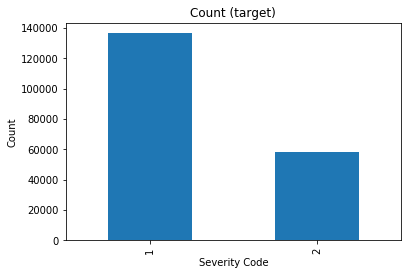

In [144]:
#Check for Balanaced Dataset.

target_count = df.SEVERITYCODE.value_counts()
print('Class 1:', target_count[1])
print('Class 2:', target_count[2])
print('Proportion:', round(target_count[1] / target_count[2], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)')
plt.ylabel('Count')
plt.xlabel('Severity Code');

In [145]:
#Balance Dataset.

SeverityCode1 = df[df['SEVERITYCODE']==1]
SeverityCode2 = df[df['SEVERITYCODE']==2]

In [146]:
SeverityCode1.shape,SeverityCode2.shape

((136485, 17), (58188, 17))

In [147]:
SeverityCode1 = SeverityCode1.sample(SeverityCode2.shape[0])
SeverityCode1.shape

(58188, 17)

In [148]:
df = SeverityCode2.append(SeverityCode1,ignore_index=True)
df.shape

(116376, 17)

Class 1: 58188
Class 2: 58188
Proportion: 1.0 : 1


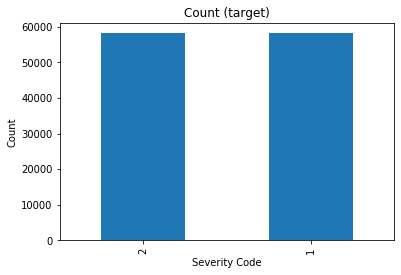

In [149]:
#Recheck for Balanaced Dataset.

target_count = df.SEVERITYCODE.value_counts()
print('Class 1:', target_count[1])
print('Class 2:', target_count[2])
print('Proportion:', round(target_count[1] / target_count[2], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)')
plt.ylabel('Count')
plt.xlabel('Severity Code');

## Feature Engineering

In [150]:
#Convert to Date Time Object.

df['INCDTTM'] = pd.to_datetime(df['INCDTTM'])
df.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR
0,2,1,1,2,0,0,2,2013-03-27 14:54:00,1,0,0,2,1,0,0,0,0
1,2,1,1,2,0,0,2,2004-01-28 08:04:00,1,0,0,1,1,0,0,0,0
2,2,1,7,3,0,1,1,2020-04-15 17:47:00,1,0,0,0,0,0,0,0,0
3,2,1,1,2,0,0,2,2006-03-20 15:49:00,1,0,0,0,0,0,0,0,0
4,2,0,9,2,0,0,2,2013-03-31 02:09:00,0,0,0,0,0,1,0,0,0


In [151]:
#Evaluate Day of Week that Accidents Occured.

df['dayofweek'] = df['INCDTTM'].dt.dayofweek

df_dayofweek = df.groupby(['dayofweek'])['SEVERITYCODE'].value_counts()
df_dayofweek

dayofweek  SEVERITYCODE
0          2               7973
           1               7805
1          2               8731
           1               8335
2          2               8757
           1               8631
3          2               9018
           1               8726
4          1               9672
           2               9559
5          1               8177
           2               8047
6          1               6842
           2               6103
Name: SEVERITYCODE, dtype: int64

In [152]:
#Unstack Dataframe for Plotting.

df_dayofweek = df_dayofweek.unstack()

Text(0, 0.5, 'count')

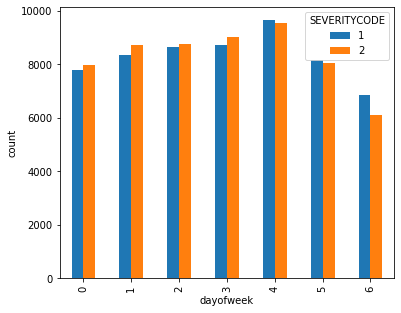

In [153]:
#Create Plot.

df_dayofweek.plot(kind='bar', figsize=(6,5))
plt.ylabel('count')

In [154]:
#Create Time of Day Bins for Comparison.

df['hour'] = df['INCDTTM'].dt.hour

In [155]:
#Populate Bins.

b = [0,4,8,12,16,20,24]
l = [0,1,2,3,4,5]
df['timeofday'] = pd.cut(df['hour'], bins=b, labels=l, include_lowest=True)
df['timeofday'] = pd.to_numeric(df['timeofday'])

In [156]:
#Evaluate Time of Day that Accidents Occured.

df_timeofday = df.groupby(['timeofday'])['SEVERITYCODE'].value_counts()
df_timeofday

timeofday  SEVERITYCODE
0          1               14017
           2               11574
1          2                6352
           1                5691
2          1               10301
           2                9936
3          2               14208
           1               12835
4          2               11867
           1               10519
5          1                4825
           2                4251
Name: SEVERITYCODE, dtype: int64

In [157]:
#Unstack Dataframe for Plotting.

df_timeofday = df_timeofday.unstack()
df_timeofday

SEVERITYCODE,1,2
timeofday,,
0,14017,11574
1,5691,6352
2,10301,9936
3,12835,14208
4,10519,11867
5,4825,4251


Text(0, 0.5, 'count')

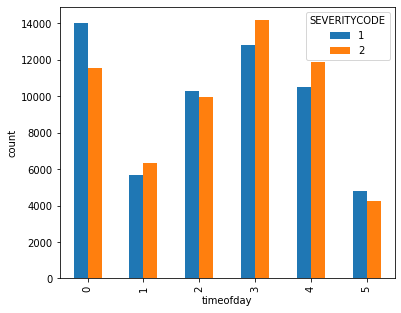

In [158]:
#Create Plot.

df_timeofday.plot(kind='bar', figsize=(6,5))
plt.ylabel('count')

## Feature Selection

In [159]:
Feature = df[['ADDRTYPE', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'JUNCTIONTYPE',\
             'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT', 'SPEEDING', 'HITPARKEDCAR',\
             'dayofweek', 'timeofday']]

In [160]:
X = Feature
y = df['SEVERITYCODE']

## Normalize Data / Train Test Split

In [161]:
#Since all Data was Previously Converted to Numbers, Models Were Tested With, and Without, Preprocessing.

X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.26, -0.67, -0.37, -0.24, -0.21,  0.14,  0.2 , -0.44, -0.23,
         1.23,  0.8 , -0.56, -0.2 , -0.23, -0.17, -0.48,  0.43],
       [ 1.26, -0.67, -0.37, -0.24, -0.21,  0.14,  0.2 , -0.44, -0.23,
         0.28,  0.8 , -0.56, -0.2 , -0.23, -0.17, -0.48, -0.81],
       [ 1.26,  2.04,  0.34, -0.24,  4.61, -1.36,  0.2 , -0.44, -0.23,
        -0.66, -0.58, -0.56, -0.2 , -0.23, -0.17, -0.48,  1.05],
       [ 1.26, -0.67, -0.37, -0.24, -0.21,  0.14,  0.2 , -0.44, -0.23,
        -0.66, -0.58, -0.56, -0.2 , -0.23, -0.17, -1.53,  0.43],
       [-0.78,  2.94, -0.37, -0.24, -0.21,  0.14, -0.88, -0.44, -0.23,
        -0.66, -0.58,  0.41, -0.2 , -0.23, -0.17,  1.6 , -1.43]])

In [162]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (93100, 17) (93100,)
Test set: (23276, 17) (23276,)


## K Nearest Neighbor (KNN)

In [163]:
from sklearn.neighbors import KNeighborsClassifier

In [164]:
#Begin with K = 7.

k = 7

#Train Model and Predict.

neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [165]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 1, 2, 1, 2], dtype=int64)

In [166]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.7347046186895811
Test set Accuracy:  0.6715930572263276


In [167]:
#Determine Best K.

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict.  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.64, 0.63, 0.66, 0.65, 0.67, 0.66, 0.67, 0.67, 0.68])

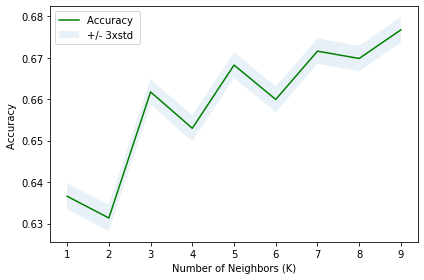

In [168]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [169]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.6767485822306238 with k= 9


In [170]:
#Rerun Model if Required.
#When data standardization is applied, the best K is 9.
#When data standardization is not applied, the best K is usually 7 (sometimes it is 9).

k = 9

#Train Model and Predict.  

neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [171]:
#Rerun Prediction if Required.

yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 1, 2, 1, 2], dtype=int64)

In [172]:
#Compute Accuracy Scores.

KNN_F1 = round(f1_score(y_test, yhat),2)
KNN_Jaccard = round(jaccard_similarity_score(y_test, yhat),2)
KNN_LogLoss = round(log_loss(y_test, yhat),2)


print("K Nearest Neighbor's F1 Score: ", KNN_F1)
print("K Nearest Neighbor's Jaccard Score: ", KNN_Jaccard)
print("K Nearest Neighbor's LogLoss Score: ", KNN_LogLoss)

K Nearest Neighbor's F1 Score:  0.67
K Nearest Neighbor's Jaccard Score:  0.68
K Nearest Neighbor's LogLoss Score:  17.31


C:\Users\mike_\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [173]:
#Define Function for Confusion Matrix.

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           1       0.69      0.64      0.67     11664
           2       0.66      0.71      0.69     11612

    accuracy                           0.68     23276
   macro avg       0.68      0.68      0.68     23276
weighted avg       0.68      0.68      0.68     23276

Confusion matrix, without normalization
[[7512 4152]
 [3372 8240]]


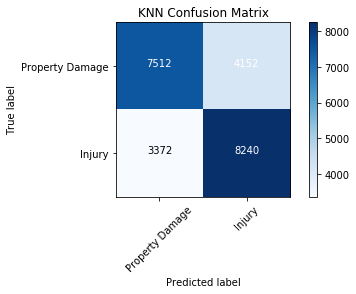

In [174]:
#Compute Confusion Matrix.

cnf_matrix = confusion_matrix(y_test, yhat, labels=None)
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

#Plot Non-normalized Confusion Matrix.

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Property Damage','Injury'],normalize= False,  title='KNN Confusion Matrix')

## Decision Tree

In [175]:
DTree = DecisionTreeClassifier(criterion="entropy", max_depth = 7)

In [176]:
#Train Model.

DTree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [177]:
#Predict.

PredTree = DTree.predict(X_test)

In [178]:
print (PredTree [0:5])
print (y_test [0:5])

[2 1 2 1 2]
93822     1
109172    1
32284     2
29807     2
5015      2
Name: SEVERITYCODE, dtype: int64


In [179]:
#Compute Accuracy Scores.

DecTree_F1 = round(f1_score(y_test, PredTree),2)
DecTree_Jaccard = round(jaccard_similarity_score(y_test, PredTree),2)
DecTree_LogLoss = round(log_loss(y_test, PredTree),2)


print("DecisionTree's F1 Score: ", DecTree_F1)
print("DecisionTree's Jaccard Score: ", DecTree_Jaccard)
print("DecisionTree's LogLoss Score: ", DecTree_LogLoss)

DecisionTree's F1 Score:  0.67
DecisionTree's Jaccard Score:  0.71
DecisionTree's LogLoss Score:  17.31


C:\Users\mike_\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


              precision    recall  f1-score   support

           1       0.69      0.64      0.67     11664
           2       0.66      0.71      0.69     11612

    accuracy                           0.68     23276
   macro avg       0.68      0.68      0.68     23276
weighted avg       0.68      0.68      0.68     23276

Confusion matrix, without normalization
[[6882 4782]
 [2012 9600]]


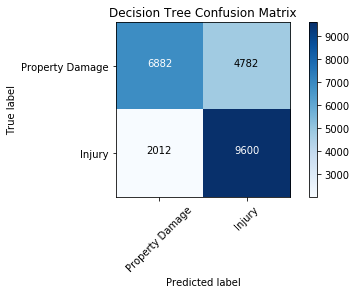

In [180]:
#Compute Confusion Matrix.

cnf_matrix = confusion_matrix(y_test, PredTree, labels=None)
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

#Plot Non-normalized Confusion Matrix.

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Property Damage','Injury'],normalize= False,  title='Decision Tree Confusion Matrix')

## Support Vector Machine (SVM)

In [181]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [182]:
yhat = clf.predict(X_test)
yhat [0:5]

array([1, 1, 2, 1, 2], dtype=int64)

In [183]:
#Compute Accuracy Scores.

SVM_F1 = round(f1_score(y_test, yhat),2)
SVM_Jaccard = round(jaccard_similarity_score(y_test, yhat),2)
SVM_LogLoss = round(log_loss(y_test, yhat),2)


print("Support Vector Machine's F1 Score: ", SVM_F1)
print("Support Vector Machine's Jaccard Score: ", SVM_Jaccard)
print("Support Vector Machine's LogLoss Score: ", SVM_LogLoss)

Support Vector Machine's F1 Score:  0.68
Support Vector Machine's Jaccard Score:  0.69
Support Vector Machine's LogLoss Score:  17.31


C:\Users\mike_\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


              precision    recall  f1-score   support

           1       0.70      0.66      0.68     11664
           2       0.68      0.72      0.70     11612

    accuracy                           0.69     23276
   macro avg       0.69      0.69      0.69     23276
weighted avg       0.69      0.69      0.69     23276

Confusion matrix, without normalization
[[7684 3980]
 [3225 8387]]


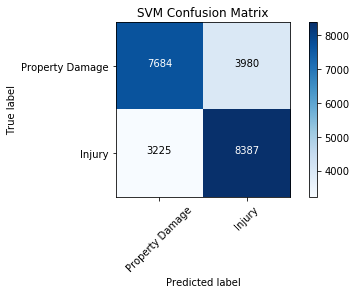

In [184]:
#Compute Confusion Matrix.

cnf_matrix = confusion_matrix(y_test, yhat, labels=None)
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

#Plot Non-normalized Confusion Matrix.

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Property Damage','Injury'],normalize= False,  title='SVM Confusion Matrix')

## Logistic Regression

In [185]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [186]:
yhat = LR.predict(X_test)
yhat[0:5]

array([1, 1, 2, 2, 1], dtype=int64)

In [187]:
#Compute Accuracy Scores

LR_F1 = round(f1_score(y_test, PredTree),2)
LR_Jaccard = round(jaccard_similarity_score(y_test, PredTree),2)
LR_LogLoss = round(log_loss(y_test, yhat),2)

print("Logistic Regression's F1 Score: ", LR_F1)
print("Logistic Regression's Jaccard Score: ", LR_Jaccard)
print("Logistic Regression's Log Loss: ", LR_LogLoss)

Logistic Regression's F1 Score:  0.67
Logistic Regression's Jaccard Score:  0.71
Logistic Regression's Log Loss:  17.31


C:\Users\mike_\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


              precision    recall  f1-score   support

           1       0.65      0.71      0.68     11664
           2       0.68      0.62      0.65     11612

    accuracy                           0.66     23276
   macro avg       0.67      0.66      0.66     23276
weighted avg       0.67      0.66      0.66     23276

Confusion matrix, without normalization
[[8269 3395]
 [4405 7207]]


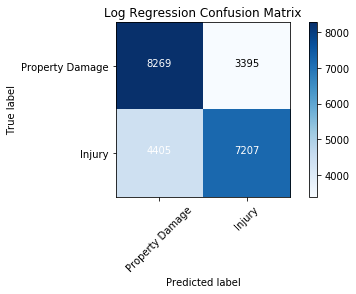

In [188]:
#Compute Confusion Matrix.

cnf_matrix = confusion_matrix(y_test, yhat, labels=None)
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

#Plot Non-normalized Confusion Matrix.

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Property Damage','Injury'],normalize= False,\
                      title='Log Regression Confusion Matrix')

## Build Report of Model Scores

In [189]:
#Initialize list for Report.

data = [['KNN', KNN_Jaccard, KNN_F1, KNN_LogLoss], ['Decision Tree', DecTree_Jaccard, DecTree_F1, DecTree_LogLoss],
        ['SVM', SVM_Jaccard, SVM_F1, SVM_LogLoss],['Logistic Regression', LR_Jaccard, LR_F1, LR_LogLoss]]

In [190]:
#Create Pandas DataFrame.

Report_df = pd.DataFrame(data, columns = ['Algorithm', 'Jaccard', 'F1-Score', 'LogLoss'])

Report_df.set_index('Algorithm', inplace=True)

Report_df  

,Jaccard,F1-Score,LogLoss
Algorithm,,,
KNN,0.68,0.67,17.31
Decision Tree,0.71,0.67,17.31
SVM,0.69,0.68,17.31
Logistic Regression,0.71,0.67,17.31
